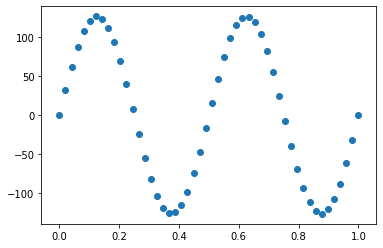

In [2]:
# 正弦波の作成
amp = 0.5 # 振幅
frq = 2   # 周波数
sr = 50   # サンプリング周波数
sec = 1   # 波形を生成する時間

# サンプリングする時間
t = np.linspace(0, sec, sr * sec)

# 各時間における正弦波の作成
y = amp * np.sin(2 * np.pi * frq * t)

# 8ビットで量子化
y = (y / max(abs(y)) * np.iinfo(np.int8).max ).astype(np.int8)

# 描画
plt.scatter(t, y)

In [3]:
# np.linspace(開始, 終了, 要素数)
np.linspace(0, 4, 5)

array([0., 1., 2., 3., 4.])

In [4]:
# 440Hzの波の生成(共通部分)
sr = 44100  # サンプリング周波数
frq = 440   # 波の周波数 
sec = 5     # 再生時間

# サンプリング時間
t = np.linspace(0, sec, sr * sec)

# サンプリング時間における波の瞬時値
y = np.sin(2 * np.pi * frq * t)

# 16ビットで量子化
y = (y / max(abs(y)) * np.iinfo(np.int16).max).astype(np.int16)

In [5]:
# 標準ライブラリでwavファイルの書き出し
import wave as wv
import struct

# ステレオに変換
y_std = np.reshape([y,y], len(y)*2, order="F")

# バイト列オブジェクトに変換
y_std = struct.pack("h" * len(y_std), *y_std)

# Wave_writeオブジェクトの生成
filename = "440Hz_standard.wav"
with wv.Wave_write(filename) as w:

    # パラメーターの設定
    w.setparams((
        2,      # チャンネル数
        2,      # 量子化バイト数. 16[bit] = 2 [byte]
        sr,     # サンプリング周波数
        len(y_std), # フレーム数
        "NONE", # 圧縮形式
        "NONE"  # 人が判断可能な圧縮形式
    ))
    
    # ファイルに書き出し
    w.writeframesraw(y_std)

In [6]:
# 標準ライブラリでwavファイルの読み込み
with wv.open(filename, 'rb') as wav:
    # wavファイルの詳細確認
    print("チャンネル数: {}, バイト数: {}, サンプリング周波数: {}, フレーム数: {}, 圧縮形式: {}, 圧縮形式詳細: {}".format(wav.getnchannels(),
      wav.getsampwidth(),
      wav.getframerate(), 
      wav.getnframes(), 
      wav.getcomptype(), 
      wav.getcompname()))
    # => チャンネル数: 2, バイト数: 2, サンプリング周波数: 44100, フレーム数: 220500, 圧縮形式: NONE, 圧縮形式詳細: not compressed
    
    # n個のフレームを読み込む
    n = 1
    print(wav.readframes(n).hex()) # 00000000
    
    # ファイル中の現在の位置を確認
    print(wav.tell()) # => 1
    
    # フレームを1つずつ読み込まれていることを確認
    print(wav.readframes(n).hex()) # => 04080408
    print(wav.tell()) # => 2
    
    #  ポインタを先頭に戻し、位置の確認
    wav.rewind()
    print(wav.tell()) # => 0

チャンネル数: 2, バイト数: 2, サンプリング周波数: 44100, フレーム数: 220500, 圧縮形式: NONE, 圧縮形式詳細: not compressed
00000000
1
04080408
2
0


In [7]:
# scipyでwavファイルの書き込み
import scipy.io.wavfile as siw

# ステレオにする
y_scipy = np.array(np.c_[y,y]) 

# ファイル名を指定して保存
filename = "440Hz_scipy.wav"
siw.write(filename, sr, y_scipy)

In [8]:
# scipyでwavファイルの読み込み
siw.read(filename)

(44100, array([[    0,     0],
        [ 2052,  2052],
        [ 4097,  4097],
        ...,
        [-4097, -4097],
        [-2052, -2052],
        [    0,     0]], dtype=int16))